# Query Analysis

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
data = pd.read_csv('employee.csv')
data.shape

(1470, 35)

## Aggregate Function Examples

In [2]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
data.groupby(data['Department']).agg('mean')

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Department,,,,,,,,,,,,,,,,,,,,,
Human Resources,37.809524,751.539683,8.698413,2.968254,1.0,1205.269841,2.682540,64.301587,2.746032,2.031746,...,2.888889,80.0,0.777778,11.555556,2.555556,2.920635,7.238095,3.539683,1.777778,3.666667
Research & Development,37.042664,806.851197,9.144641,2.899063,1.0,1006.503642,2.744017,66.167534,2.741935,1.977107,...,2.708637,80.0,0.804370,11.342352,2.792924,2.725286,6.864724,4.155047,2.137357,4.084287
Sales,36.542601,800.275785,9.365471,2.934978,1.0,1038.946188,2.679372,65.520179,2.701794,2.255605,...,2.695067,80.0,0.773543,11.105381,2.847534,2.816143,7.284753,4.486547,2.354260,4.271300


In [4]:
data[['Age', 'Department']].groupby(data['Department']).agg('mean') # get particular levels' data as per the group

,Age
Department,
Human Resources,37.809524
Research & Development,37.042664
Sales,36.542601


In [5]:
data[['Age', 'Department']].groupby(data['Department']).agg(['median', 'sum'])

Age       
                       median    sum
Department                          
Human Resources            37   2382
Research & Development     36  35598
Sales                      35  16298

In [6]:
data[['Age', 'Department']].groupby(data['Department']).agg('median', 'sum') # Use [] to get more than one aggregate function results

,Age
Department,
Human Resources,37
Research & Development,36
Sales,35


In [7]:
data[['Age', 'Department']].groupby(data['Department']).agg(min)

,Age,Department
Department,,
Human Resources,19,Human Resources
Research & Development,18,Research & Development
Sales,18,Sales


In [8]:
data[['Age', 'Department']].groupby(data['Department']).agg('var')

,Age
Department,
Human Resources,85.124424
Research & Development,84.253386
Sales,81.588069


In [9]:
data[['Age', 'Department']].groupby(data['Department']).agg('count')

,Age,Department
Department,,
Human Resources,63,63
Research & Development,961,961
Sales,446,446


In [10]:
data[['Age', 'Department']].groupby(data['Department']).agg('nunique')

,Age,Department
Department,,
Human Resources,30,1
Research & Development,43,1
Sales,42,1


## Now lets' try our hands at idxmax and idxmin

In [11]:
data.loc[data.groupby(data['Department'])['MonthlyIncome'].idxmax()]

# idxmax of a column returns the row's value. If used groupby, rows with maximum value of the column are shown

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
956,56,No,Travel_Rarely,206,Human Resources,8,4,Life Sciences,1,1338,...,1,80,0,36,4,3,7,3,7,7
190,52,No,Travel_Rarely,699,Research & Development,1,4,Life Sciences,1,259,...,1,80,1,34,5,3,33,18,11,9
918,51,No,Travel_Frequently,237,Sales,9,3,Life Sciences,1,1282,...,1,80,1,31,5,2,29,10,11,10


In [12]:
data.loc[data.groupby(data['Department'])['MonthlyIncome'].idxmax()][['Department', 'EmployeeNumber', 'MonthlyIncome']]

,Department,EmployeeNumber,MonthlyIncome
956,Human Resources,1338,19717
190,Research & Development,259,19999
918,Sales,1282,19847


In [13]:
data.loc[data.groupby(data['Department'])['MonthlyIncome'].idxmin()][['Department', 'EmployeeNumber', 'MonthlyIncome']]

,Department,EmployeeNumber,MonthlyIncome
1222,Human Resources,1714,1555
513,Research & Development,701,1009
764,Sales,1056,1052


## Color Scales

In [14]:
data[['Age', 'Department']].groupby(data['Department']).agg('mean').style.background_gradient(cmap = 'Reds')

,Age
Department,
Human Resources,37.809524
Research & Development,37.042664
Sales,36.542601


In [15]:
data[['Age', 'Department']].groupby(data['Department']).agg('var').style.background_gradient(cmap = 'copper')

,Age
Department,
Human Resources,85.124424
Research & Development,84.253386
Sales,81.588069


## Visualizing Groupby Operations

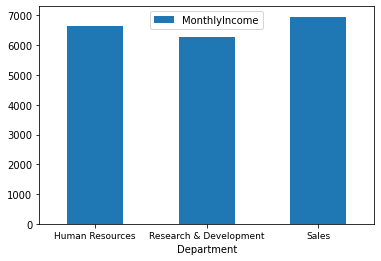

In [23]:
data[['MonthlyIncome', 'Department']].groupby(data['Department']).agg('mean').plot(kind = 'bar')
plt.xticks(rotation = 0, fontsize = 9)
plt.show()

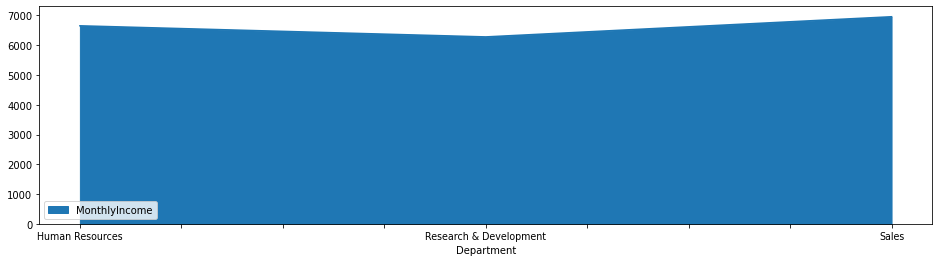

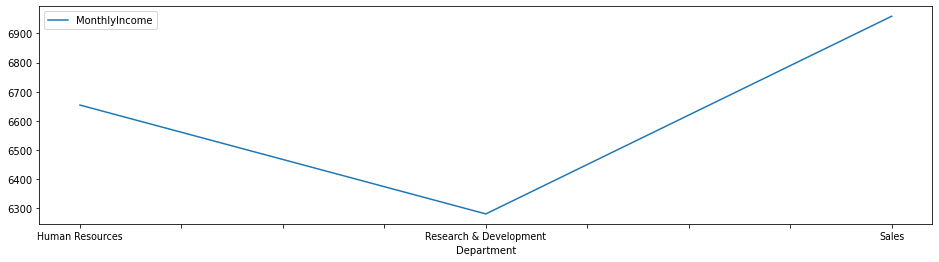

In [29]:
data[['MonthlyIncome', 'Department']].groupby(data['Department']).agg('mean').plot(kind = 'area')
plt.xticks(rotation = 0, fontsize = 9.5)
plt.show()
data[['MonthlyIncome', 'Department']].groupby(data['Department']).agg('mean').plot(kind = 'line')
plt.xticks(rotation = 0, fontsize = 9.5)
plt.show()